# Ensembles

In [1]:
import time
import datetime
import bz2

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Gradient boosting 

In [2]:
df = pd.read_csv('data_ML.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR,ROCI_10,ROCI_20,ROCI_40,ROCI_60,ROCI_120,close_change
date,,,,,,,,,,,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044,1.411300,1.411300,1.411300,0.0,0.0,0.0,0.0,0.0,0.0,0
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281,1.413250,1.410650,1.411950,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492,1.419013,1.408520,1.413767,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943,1.425675,1.406675,1.416175,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094,1.426915,1.407685,1.417300,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
X_train = df.copy(deep=True)
X_train.drop(['close_change', 'close'],axis=1, inplace= True)
X_train.drop(X_train.index[-200:],inplace= True)
X_train = StandardScaler().fit_transform(X_train)
#X_train

In [4]:
X_test = df.copy(deep=True)
X_test.drop(['close_change', 'close'],axis=1, inplace= True)
X_test.drop(X_test.index[:-200],inplace= True)
X_test = StandardScaler().fit_transform(X_test)
#X_test

In [5]:
y_train =  df['close'][:-200]

In [6]:
date_list = df.index[-200:].to_list()


Learing rate is: 2
      Iter       Train Loss   Remaining Time 
         1           0.0130            2.49s
         2           0.0130            2.48s
         3           0.0130            1.65s
         4           0.0130            1.85s
         5           0.0130            1.96s
         6           0.0130            2.03s
         7           0.0130            2.08s
         8           0.0130            1.81s
         9           0.0130            1.87s
        10           0.0130            1.92s
        20           0.0130            1.84s
        30           0.0130            1.76s
        40           0.0130            1.63s
        50           0.0130            1.56s
        60           0.0130            1.49s
        70           0.0130            1.41s
        80           0.0130            1.32s
        90           0.0130            1.24s
       100           0.0130            1.17s
       200           0.0130            0.39s
score -2.220446049250313e-16


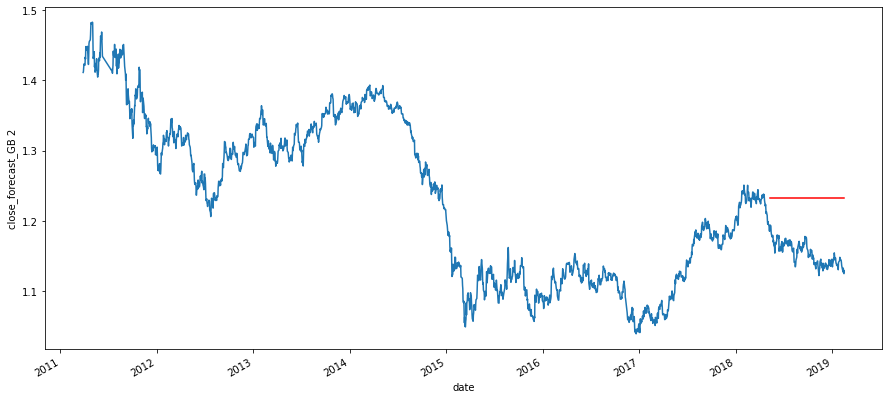


Learing rate is: 1
      Iter       Train Loss   Remaining Time 
         1           0.0002            2.49s
         2           0.0001            2.48s
         3           0.0001            2.47s
         4           0.0001            2.46s
         5           0.0001            1.96s
         6           0.0000            2.03s
         7           0.0000            2.08s
         8           0.0000            2.12s
         9           0.0000            2.14s
        10           0.0000            2.16s
        20           0.0000            1.96s
        30           0.0000            1.83s
        40           0.0000            1.73s
        50           0.0000            1.64s
        60           0.0000            1.55s
        70           0.0000            1.47s
        80           0.0000            1.38s
        90           0.0000            1.32s
       100           0.0000            1.23s
       200           0.0000            0.40s
score 0.9999870362361918


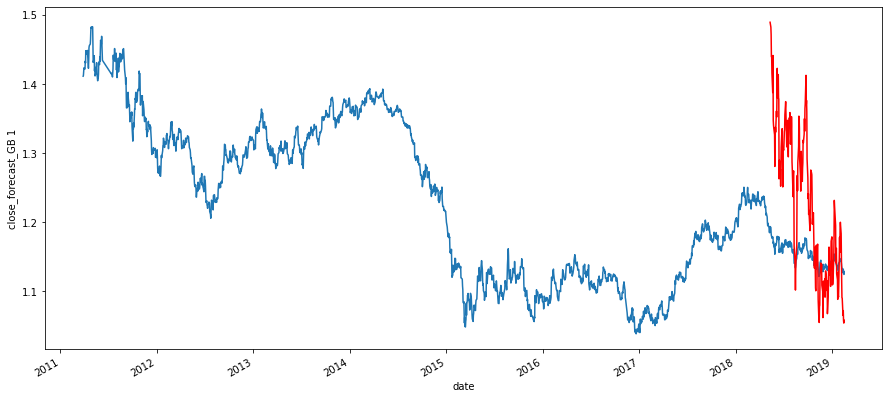


Learing rate is: 0.5
      Iter       Train Loss   Remaining Time 
         1           0.0034            2.49s
         2           0.0009            2.48s
         3           0.0003            1.65s
         4           0.0001            1.85s
         5           0.0001            1.96s
         6           0.0000            2.03s
         7           0.0000            2.08s
         8           0.0000            2.12s
         9           0.0000            1.87s
        10           0.0000            1.92s
        20           0.0000            1.84s
        30           0.0000            1.76s
        40           0.0000            1.73s
        50           0.0000            1.62s
        60           0.0000            1.57s
        70           0.0000            1.48s
        80           0.0000            1.39s
        90           0.0000            1.32s
       100           0.0000            1.24s
       200           0.0000            0.41s
score 0.9999537460447364


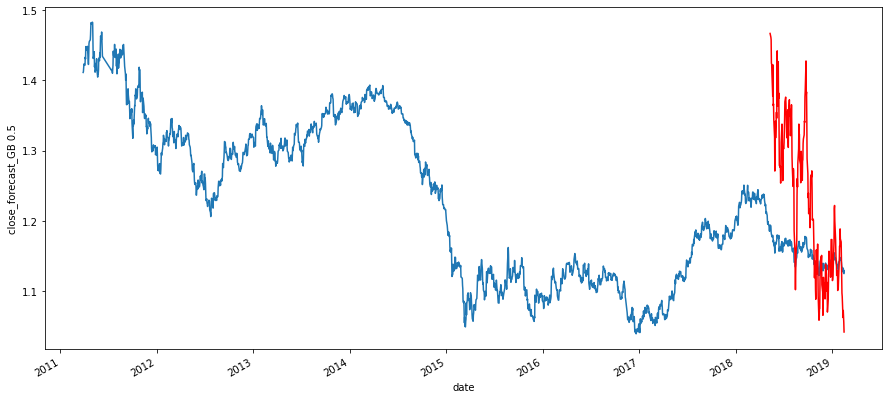


Learing rate is: 0.3
      Iter       Train Loss   Remaining Time 
         1           0.0065            0.00s
         2           0.0032            1.24s
         3           0.0016            1.65s
         4           0.0008            1.85s
         5           0.0004            1.47s
         6           0.0002            1.63s
         7           0.0001            1.74s
         8           0.0001            1.81s
         9           0.0000            1.87s
        10           0.0000            1.68s
        20           0.0000            1.73s
        30           0.0000            1.69s
        40           0.0000            1.68s
        50           0.0000            1.60s
        60           0.0000            1.52s
        70           0.0000            1.44s
        80           0.0000            1.36s
        90           0.0000            1.28s
       100           0.0000            1.20s
       200           0.0000            0.40s
score 0.9998834205367689


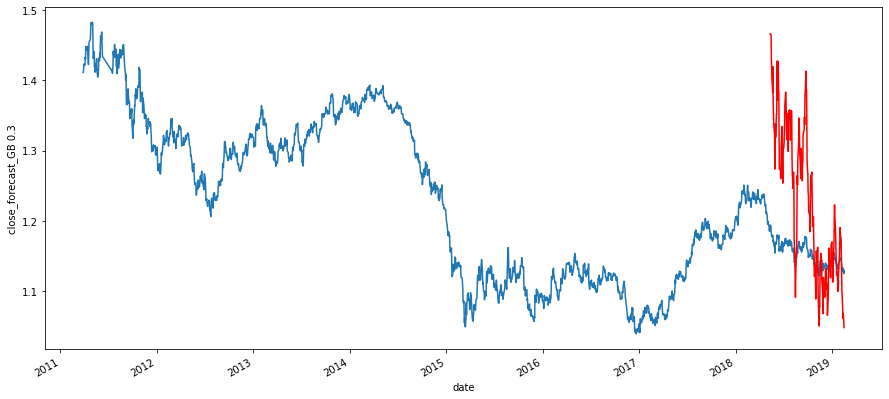


Learing rate is: 0.2
      Iter       Train Loss   Remaining Time 
         1           0.0084            0.00s
         2           0.0054            1.24s
         3           0.0035            1.65s
         4           0.0023            1.85s
         5           0.0015            1.96s
         6           0.0010            1.63s
         7           0.0006            1.74s
         8           0.0004            1.81s
         9           0.0003            1.87s
        10           0.0002            1.92s
        20           0.0000            1.73s
        30           0.0000            1.69s
        40           0.0000            1.63s
        50           0.0000            1.56s
        60           0.0000            1.52s
        70           0.0000            1.44s
        80           0.0000            1.36s
        90           0.0000            1.30s
       100           0.0000            1.22s
       200           0.0000            0.40s
score 0.9998040270301638


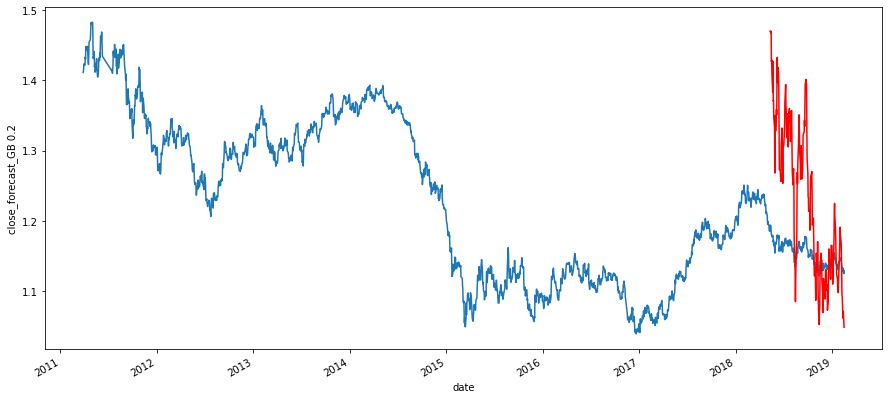


Learing rate is: 0.1
      Iter       Train Loss   Remaining Time 
         1           0.0105            2.49s
         2           0.0086            2.48s
         3           0.0070            2.47s
         4           0.0057            2.46s
         5           0.0046            1.96s
         6           0.0038            2.03s
         7           0.0031            2.08s
         8           0.0025            2.12s
         9           0.0020            2.14s
        10           0.0017            1.92s
        20           0.0002            1.84s
        30           0.0000            1.76s
        40           0.0000            1.63s
        50           0.0000            1.56s
        60           0.0000            1.49s
        70           0.0000            1.41s
        80           0.0000            1.34s
        90           0.0000            1.26s
       100           0.0000            1.19s
       200           0.0000            0.40s
score 0.9996843097063416


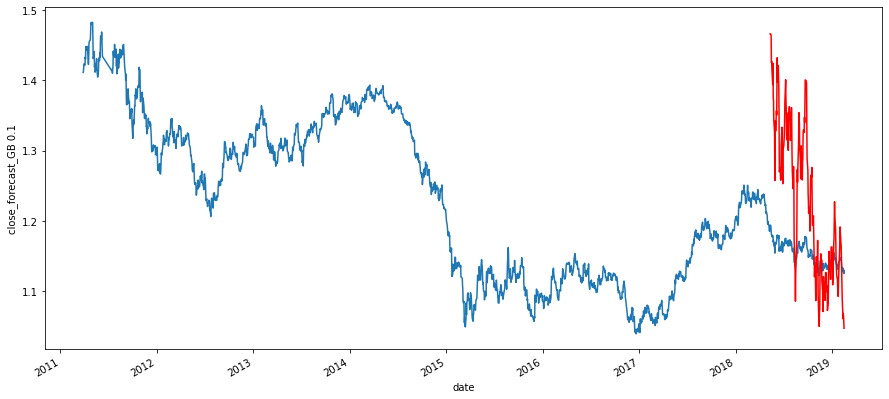


Learing rate is: 0.05
      Iter       Train Loss   Remaining Time 
         1           0.0117            0.00s
         2           0.0106            1.24s
         3           0.0096            1.65s
         4           0.0087            1.85s
         5           0.0078            1.96s
         6           0.0071            1.63s
         7           0.0064            1.74s
         8           0.0058            1.82s
         9           0.0053            1.87s
        10           0.0048            1.92s
        20           0.0018            1.73s
        30           0.0007            1.69s
        40           0.0002            1.63s
        50           0.0001            1.52s
        60           0.0000            1.46s
        70           0.0000            1.39s
        80           0.0000            1.32s
        90           0.0000            1.24s
       100           0.0000            1.16s
       200           0.0000            0.39s
score 0.9995376573453054


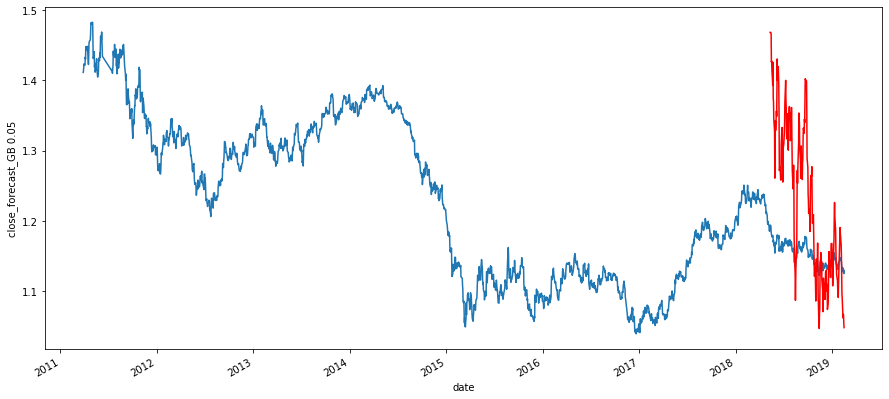


Learing rate is: 0.01
      Iter       Train Loss   Remaining Time 
         1           0.0127            2.49s
         2           0.0125            2.48s
         3           0.0122            2.47s
         4           0.0120            1.85s
         5           0.0117            1.96s
         6           0.0115            2.03s
         7           0.0113            2.08s
         8           0.0111            2.12s
         9           0.0109            1.87s
        10           0.0106            1.92s
        20           0.0087            1.84s
        30           0.0072            1.69s
        40           0.0059            1.63s
        50           0.0048            1.56s
        60           0.0040            1.46s
        70           0.0033            1.39s
        80           0.0027            1.32s
        90           0.0022            1.23s
       100           0.0018            1.16s
       200           0.0003            0.38s
score 0.9916700384450022


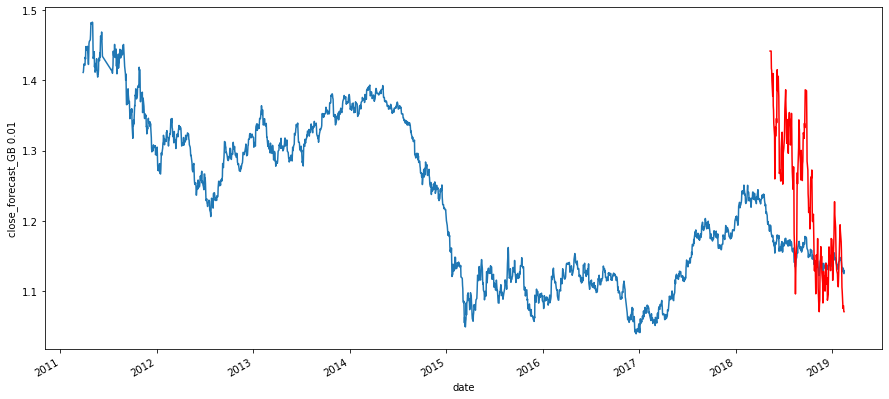


Learing rate is: 0.001
      Iter       Train Loss   Remaining Time 
         1           0.0129            2.49s
         2           0.0129            2.48s
         3           0.0129            1.65s
         4           0.0129            1.84s
         5           0.0128            1.96s
         6           0.0128            2.03s
         7           0.0128            2.08s
         8           0.0128            1.82s
         9           0.0127            1.87s
        10           0.0127            1.92s
        20           0.0125            1.84s
        30           0.0122            1.69s
        40           0.0120            1.63s
        50           0.0118            1.56s
        60           0.0115            1.46s
        70           0.0113            1.39s
        80           0.0111            1.32s
        90           0.0109            1.23s
       100           0.0107            1.16s
       200           0.0088            0.38s
score 0.38767448986678155


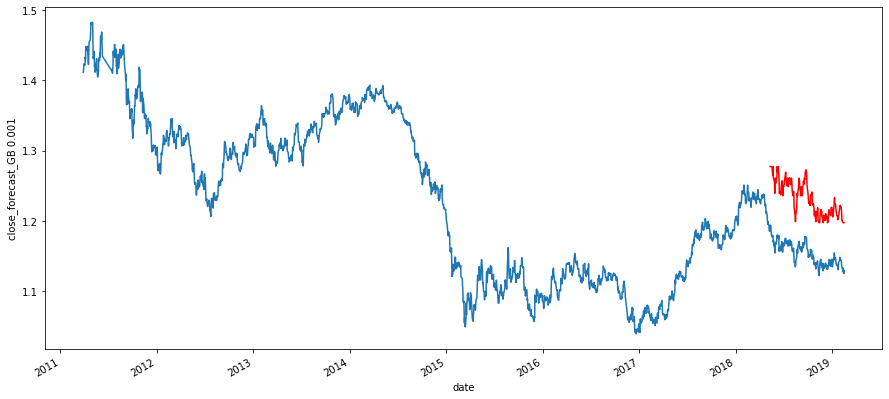

In [7]:
learning_rates =  [2, 1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.001]
dict_train = {}
dict_test = {}
for learning_rate in learning_rates:
    print("\nLearing rate is:", learning_rate)
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)
    model.predict(X_test)
    
    print("score", model.score(X_train, y_train))

    future = pd.DataFrame(index=date_list)
    future['forecast'] = model.predict(X_test)
    
    plt.figure(figsize(15,7))
    df.close.plot()
    future['forecast'].plot(color='r')
    plt.ylabel('close_forecast_GB ' + str(learning_rate))
    pylab.show()

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

In [9]:
cv = KFold(shuffle=False)


Estimators: 25
score 0.999821819313792


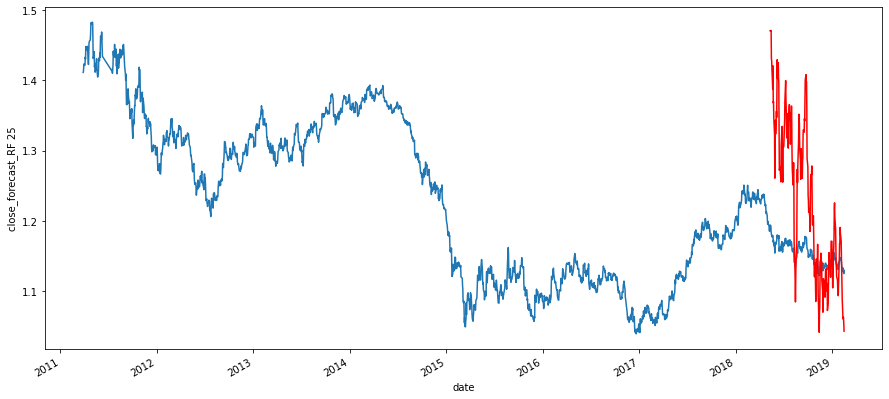


Estimators: 50
score 0.9998334024995945


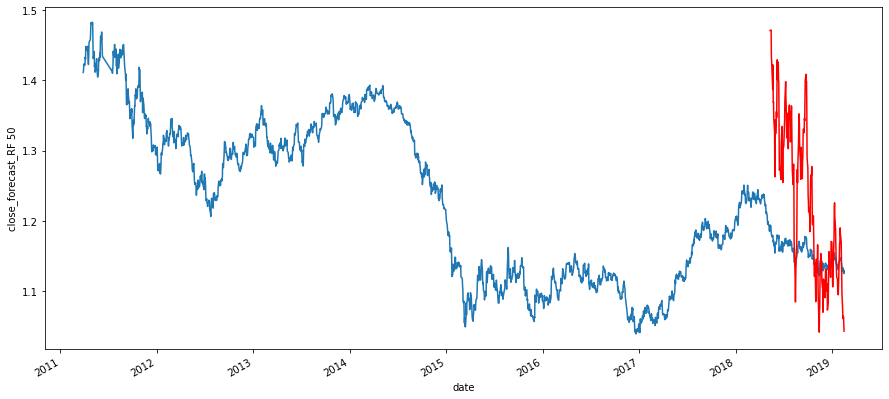


Estimators: 75
score 0.9998395423681117


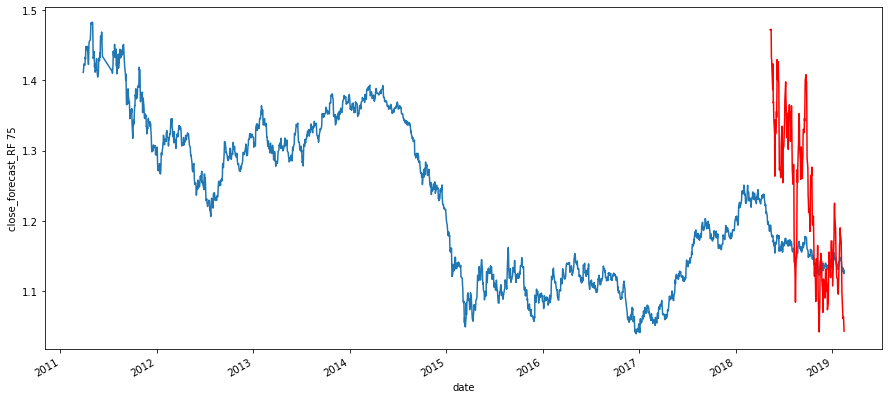


Estimators: 100
score 0.9998403781296441


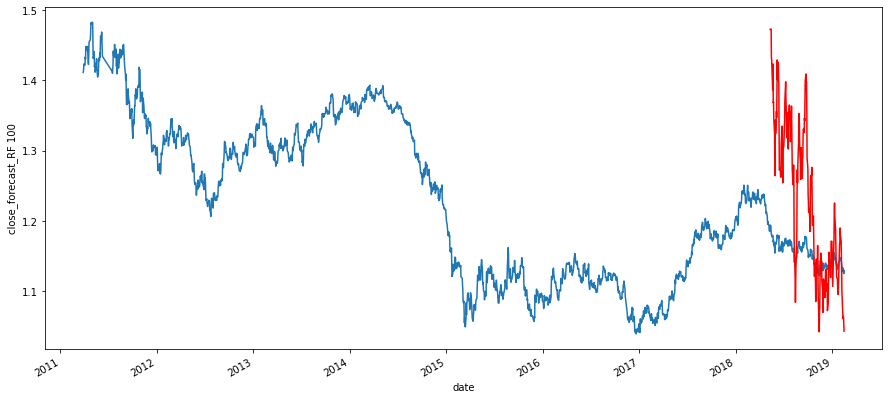


Estimators: 125
score 0.9998410837912415


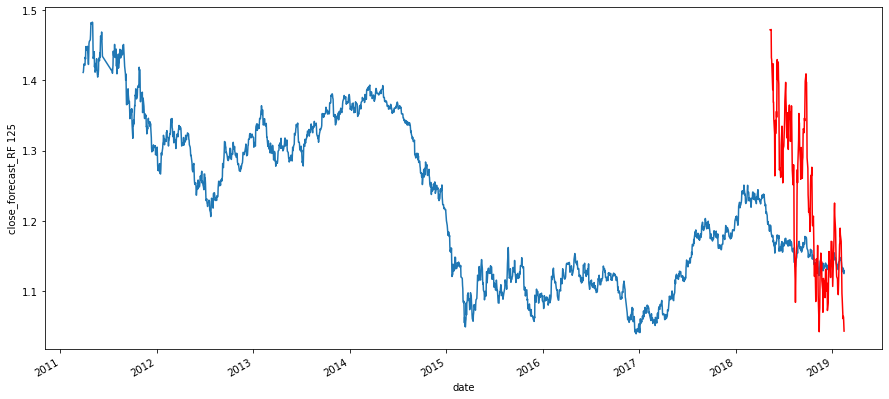


Estimators: 150
score 0.9998423564360085


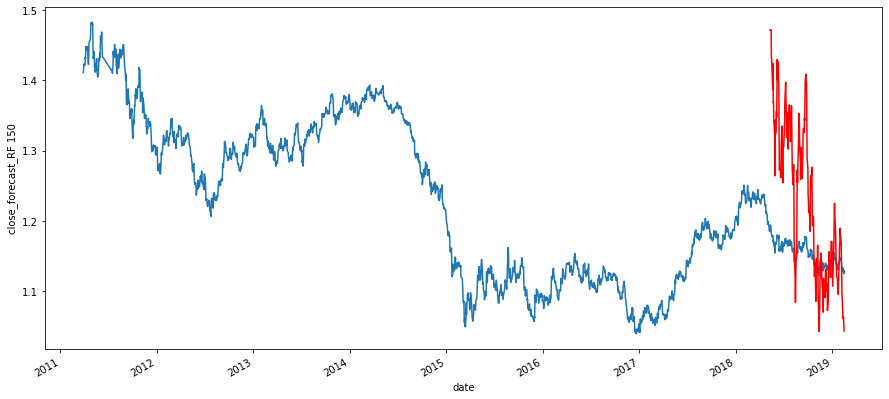


Estimators: 175
score 0.9998430111454195


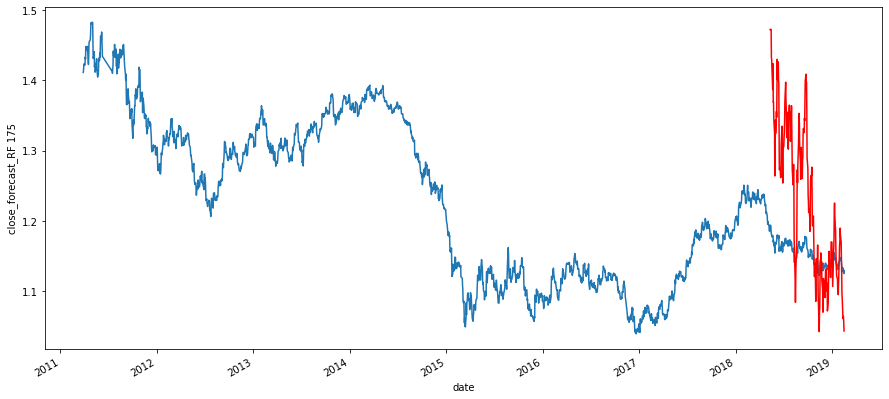


Estimators: 200
score 0.9998427639729989


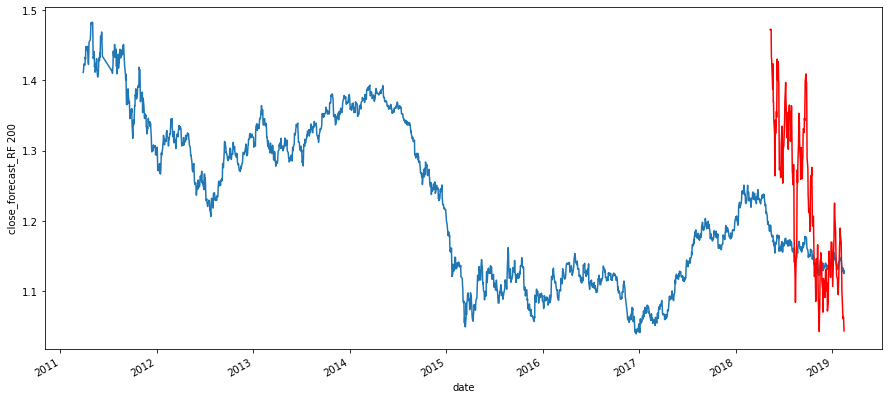


Estimators: 225
score 0.9998431919705938


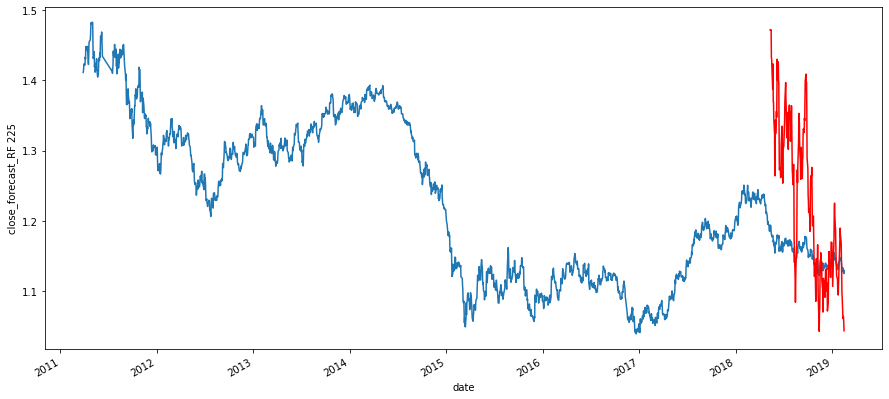


Estimators: 250
score 0.9998439127887369


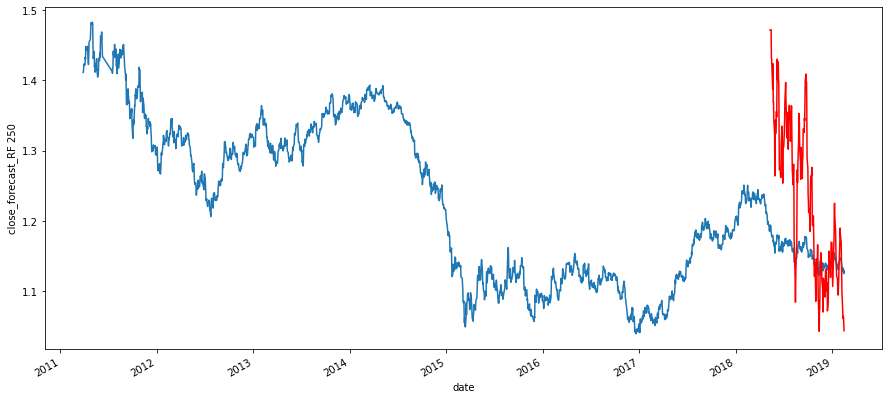


Estimators: 275
score 0.9998459102701333


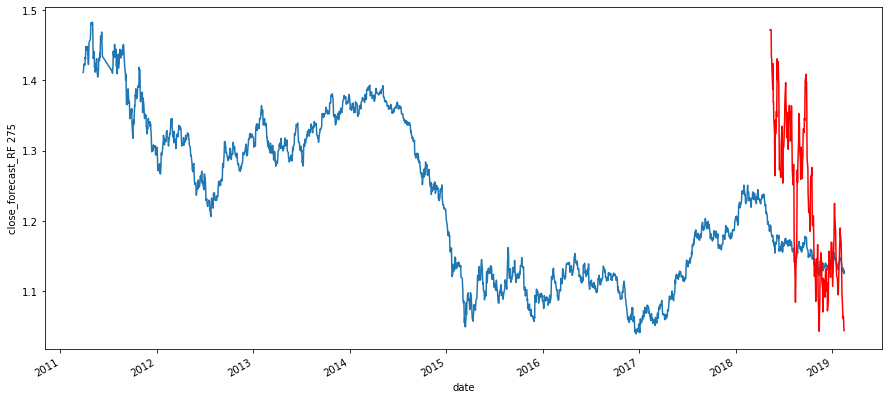

In [10]:

scores = []

for i in range(25, 300, 25):
    print("\nEstimators:", i)
    model = RandomForestRegressor(random_state=1, n_estimators=i)

    model.fit(X_train, y_train)
    model.predict(X_test)
    
    print("score", model.score(X_train, y_train))

    future = pd.DataFrame(index=date_list)
    future['forecast'] = model.predict(X_test)
    
    plt.figure(figsize(15,7))
    df.close.plot()
    future['forecast'].plot(color='r')
    plt.ylabel('close_forecast_RF ' +str(i))
    pylab.show()
    #scores.append(cross_val_score(RFR, X_train, y_train, cv=cv, scoring='r2'))

In [11]:
Estimators_list = [5, 10, 300, 400, 500]


Estimators: 5
score 0.9997100319513077


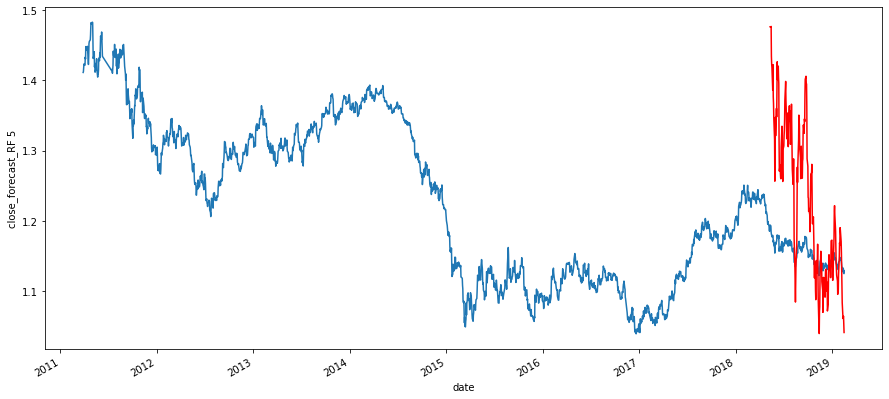


Estimators: 10
score 0.9997812028410819


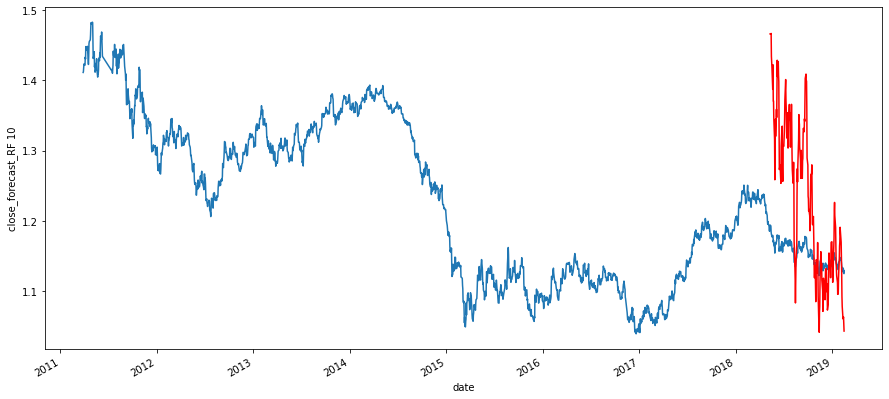


Estimators: 300
score 0.999846066642113


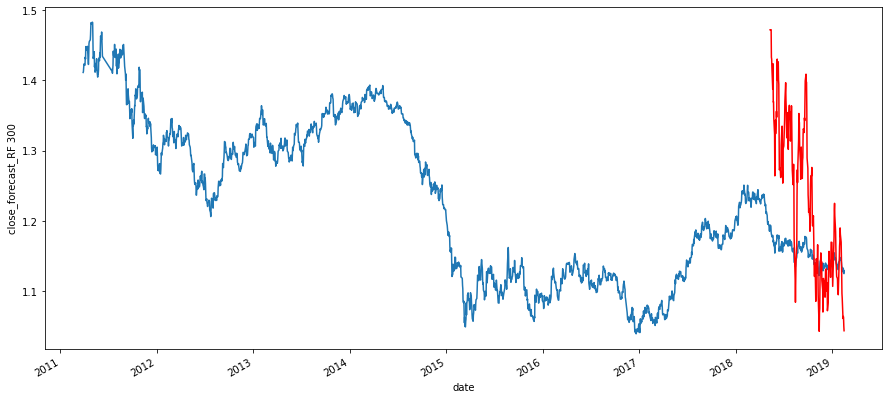


Estimators: 400
score 0.9998477517787561


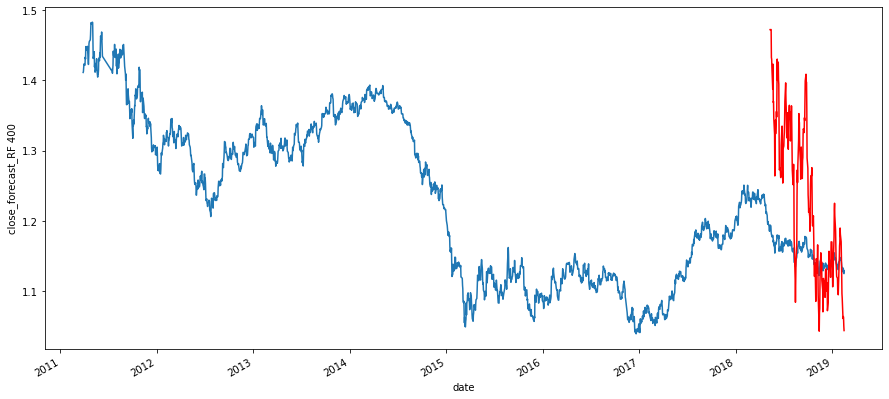


Estimators: 500
score 0.9998468529286325


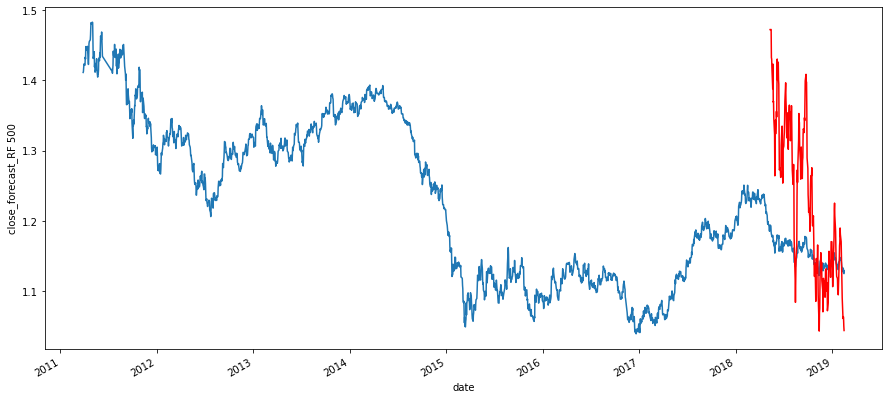

In [12]:
for i in Estimators_list:
    print("\nEstimators:", i)
    model = RandomForestRegressor(random_state=1, n_estimators=i)

    model.fit(X_train, y_train)
    model.predict(X_test)
    
    print("score", model.score(X_train, y_train))

    future = pd.DataFrame(index=date_list)
    future['forecast'] = model.predict(X_test)
    
    plt.figure(figsize(15,7))
    df.close.plot()
    future['forecast'].plot(color='r')
    plt.ylabel('close_forecast_RF ' + str(i))
    pylab.show()